# Avacado Project

### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

Content -

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

Average Price - The average price of a single avocado

Type - Whether it is conventional or organic

Year - The year information

Region - The city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

### Inspiration/Label:

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing all the necessary libraries here.

In [2]:
df = pd.read_csv('avocado.csv.zip')

we are uploading avocado csv file

In [3]:
df # checking the first 5 and last 5 rows of our dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Checking the contents of our dataset where it shows that we have 18249 rows and 14 columns. However the first column named "Unnamed" is completely useless and needs to be deleted.

Now as per our given problem statement we see that Avergae Price is the column which needs to be predicted making it our label. Since the data present in our label is in continous format this turns out to be a Regression problem!

Also the feature columns that we have are not all in numerical format and while building our machine learning model object datatypes are not acceptable.

# Exploratory Data Analysis (EDA)

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)

I have removed the "Unnamed" column from our dataset now.

In [5]:
df.shape

(18249, 13)

Here we see that the shape of our dataset has changed to 18249 rows and 13 columns.

In [6]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

Here we are taking a look at all the columns that are present in our dataset starting from Date - The date of the observation, Average Price - The average price of a single avocado, Total Volume - Total number of avocados sold, 4046 - Total number of avocados with PLU 4046 sold, 4225 - Total number of avocados with PLU 4225 sold, 4770 - Total number of avocados with PLU 4770 sold, Total Bags - Total number of bags that were given out, Small Bags - Total number of small bags that were given out, Large Bags - Total number of large bags that were given out, XLarge Bags - Total number of extra large bags that were given out, Type - Whether it is conventional or organic, Year - The year information and Region - The city or region of the observation.

We may need to separate or bifurcate few columns depending on it's possibilities and rename them accordingly too.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


The info method provides us insights such as the data type of our columns and whether we have any null values present in our dataset or not. It looks like we do not have any null values but we saw "0.0" values present in the columns so we may have to either keep it the same way, treat it by using mean/mode option or delete it completely.

There are 9 columns in our dataset with float values, 1 column with integer value and 3 columns with object data type.

In [8]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

I was simply cross verifying for null values and luckily we do not have any missing data that needs to be treated.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


Uisng the describe method in transpose format we are able to see information about numerical columns since onject data types are ignored in this function. The count columns again confirms of our dataset having no missing values.

We do have zero values present in columns 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags but they seem to be valid since there is a possibility of presence of a legitimate zero value.

In [10]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

All the unique values present in each column are segregated and listed here. This gives us an insight on how many categorical options like type and year are present and how many simply have continous data present in them.

In [11]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

The acceptable range for skewness is between +/-0.5. And we see almost all feature columns with skewness for now. Once we have processed the data further we may check for the skewness details again and if it still persists then we will need to treat it accordingly.

In [12]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,06,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,04,02,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,28,01,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,21,01,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,14,01,2018


I have separated the Date column into 3 columns namely the Year, Month and Day option so that we can remove Date the object datatype column and year that is already present in Date so we are avoiding duplicate columns.

In [13]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)
df


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,6,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,4,2,2018
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,28,1,2018
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,21,1,2018
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,14,1,2018


ince we separated the Date column that was originally an object datatype the new columns generated were also object datatype even though they were holding integer values therefore we changed the datatype and I changed the Day back to Date then got rid of the duplicate column again.

# Visualization

### Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


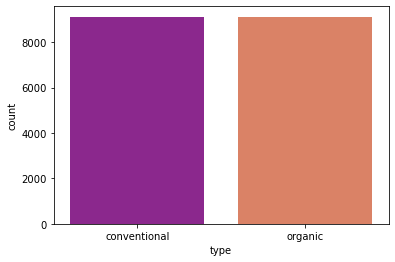

In [14]:
print(df['type'].value_counts())
sns.countplot(x='type', data=df, palette="plasma")
plt.show()

In the "type" column we have data points for conventional and organic avacados.

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: Year, dtype: int64


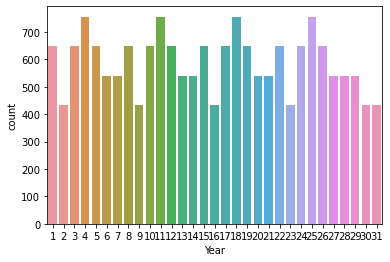

In [15]:
print(df['Year'].value_counts())
sns.countplot(x='Year', data=df)
plt.show()

In the "Date" column we can see multiple date with highest and lowest datapoint concentration. Like in the highest values we have dates 11 and 4 while for lowest values we have dates 30, 16, 9, 23, 2 and 31.

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


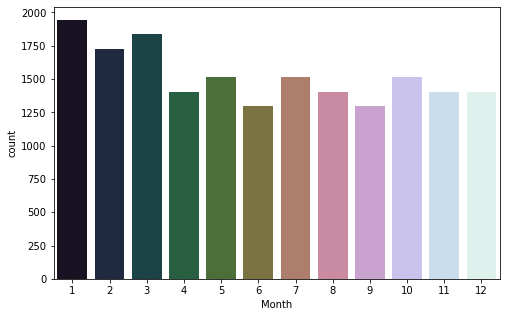

In [16]:
print(df['Month'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='Month', data=df, palette="cubehelix")
plt.show()

In the "Month" column we can see the least datapoints in the month of June that is number 6 and the highest value concentration is present in the month of January that is number 1.

2017    5722
2016    5616
2015    5615
2018    1296
Name: Date, dtype: int64


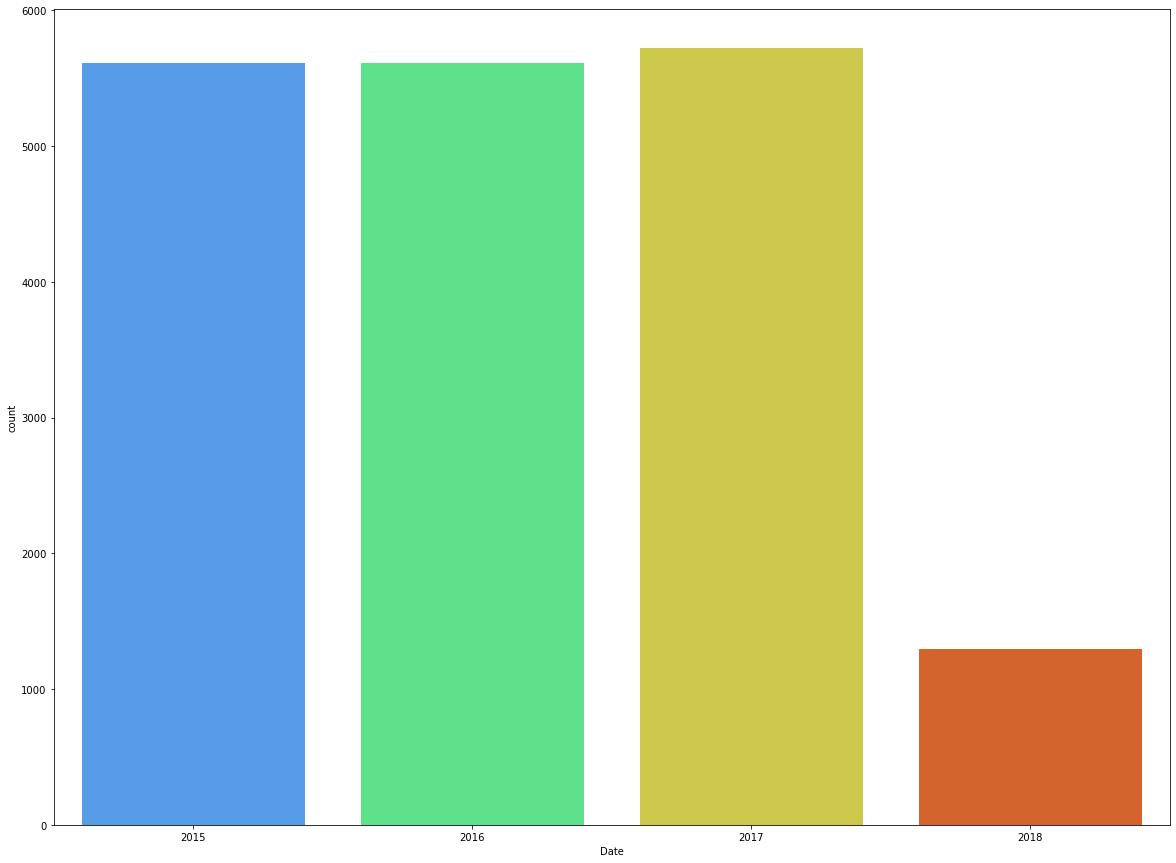

In [17]:
print(df['Date'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Date', data=df, palette="turbo")
plt.show()

In the "Year" column we see the the datapoints are very less for 2018 compared to the one's in 2015, 2016 and 2017.

PhoenixTucson          338
TotalUS                338
BaltimoreWashington    338
RaleighGreensboro      338
Syracuse               338
Southeast              338
CincinnatiDayton       338
SouthCarolina          338
Indianapolis           338
Jacksonville           338
GreatLakes             338
Chicago                338
Denver                 338
Louisville             338
HarrisburgScranton     338
MiamiFtLauderdale      338
Nashville              338
SouthCentral           338
Boise                  338
NewOrleansMobile       338
Spokane                338
Albany                 338
Plains                 338
Roanoke                338
Orlando                338
SanFrancisco           338
Atlanta                338
NorthernNewEngland     338
Boston                 338
SanDiego               338
BuffaloRochester       338
West                   338
DallasFtWorth          338
HartfordSpringfield    338
StLouis                338
LosAngeles             338
Tampa                  338
N

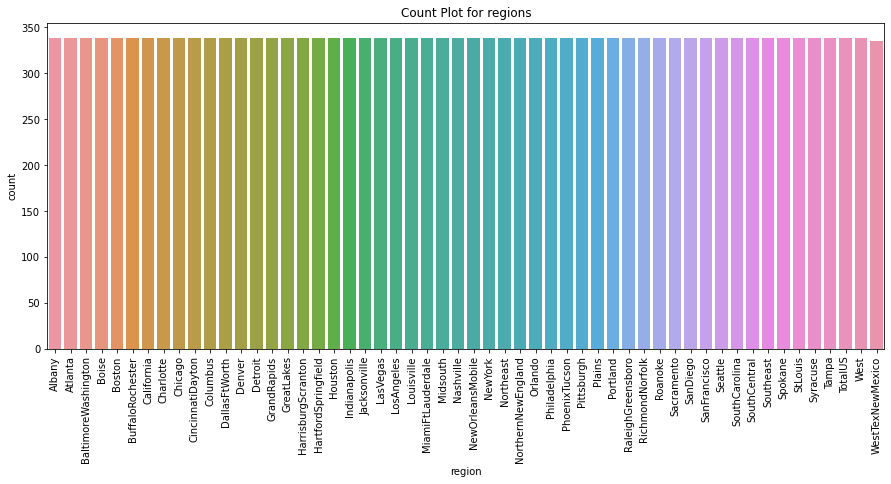

In [18]:
print(df['region'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(df['region'], data=df)
plt.title(f'Count Plot for regions')
plt.xticks(rotation=90)
plt.show()

In the "region" column we can see that the data points for almost all the values are same except WestTexNewMexico region which is a bit less than the others present in the column.

## Bivariate Analysis

<Figure size 1080x720 with 0 Axes>

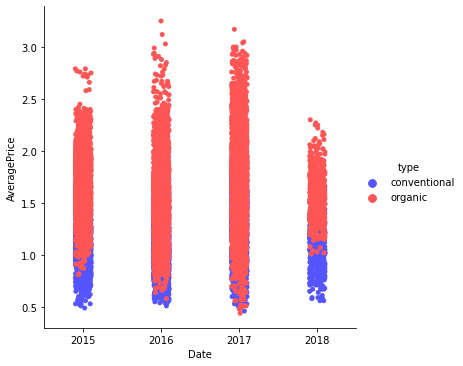

In [19]:
plt.figure(figsize=(15,10))
sns.catplot(x="Date", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

In the above categorical plot we see the Average Price information as per year and how conventional and organic types were sold. We can see that organic types are always priced higher than the conventional one's since organic farming requires lots of efforts, time and method to grow avacados that yield lesser when compared to conventional ways by using chemical fertilizers.

<Figure size 1080x720 with 0 Axes>

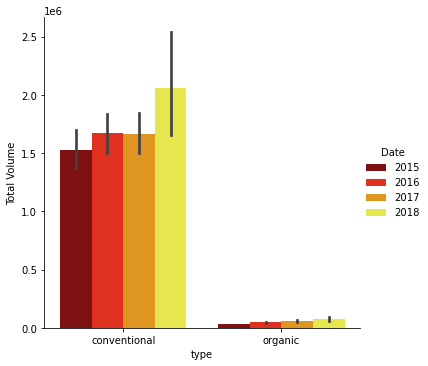

In [20]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Date", kind="bar", data=df, palette="hot")
plt.show()

In the above bar plot we see that the Total Volume for conventional type were high in all 4 years when compared to it's organic counterparts.

<Figure size 1080x720 with 0 Axes>

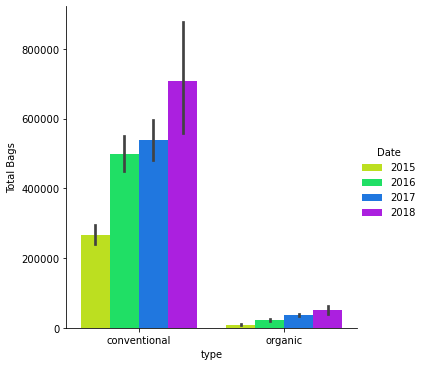

In [21]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Date", data=df, kind="bar", palette="hsv")
plt.show()

In the above bar plot we see that since the Total Volume was always high for conventional types being sold therefore the usage of bags was higher for conventional types over the organic ones. Therefore we see that Total Bags is high adn specially highest in 2018 for conventional avacados just like the Total Volume that was sold being directly proportional with each other.

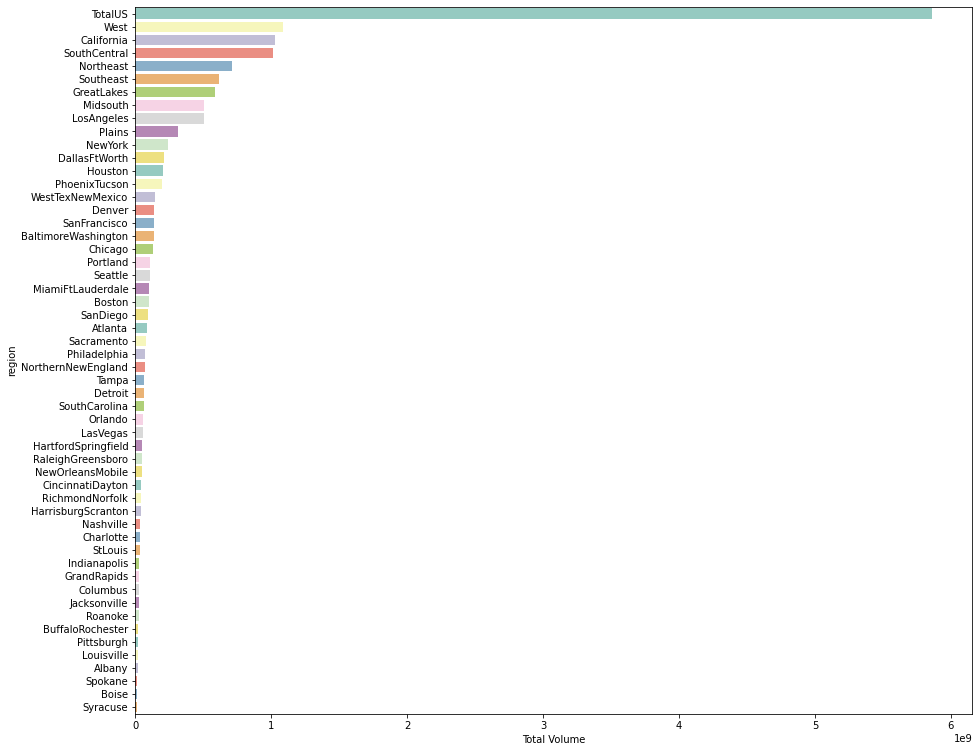

In [22]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set3")
plt.show()


In the above bar plot we can see a sorted number of Total Volume of avacados sold from each and every region. Therefore when compared to the Total US area per region values are lesser but we can see tha major contributors in region are West, California, South Central, North East, South East, Great Lakes, Mid South, Los Angeles, Plains, New York and so forth.

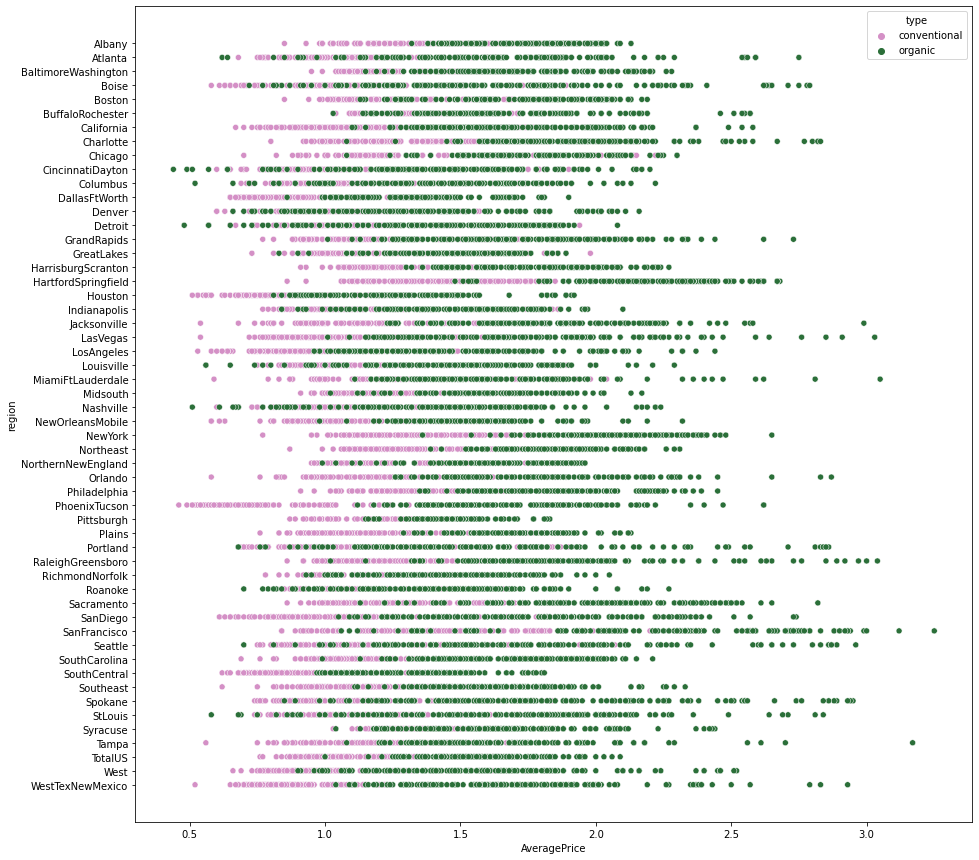

In [23]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="cubehelix_r")
plt.show()

In the above scatter plot that holds data between Region vs Average Price we can see clearly how organic avacados are priced way higher than it's conventional counterparts in each and every region.

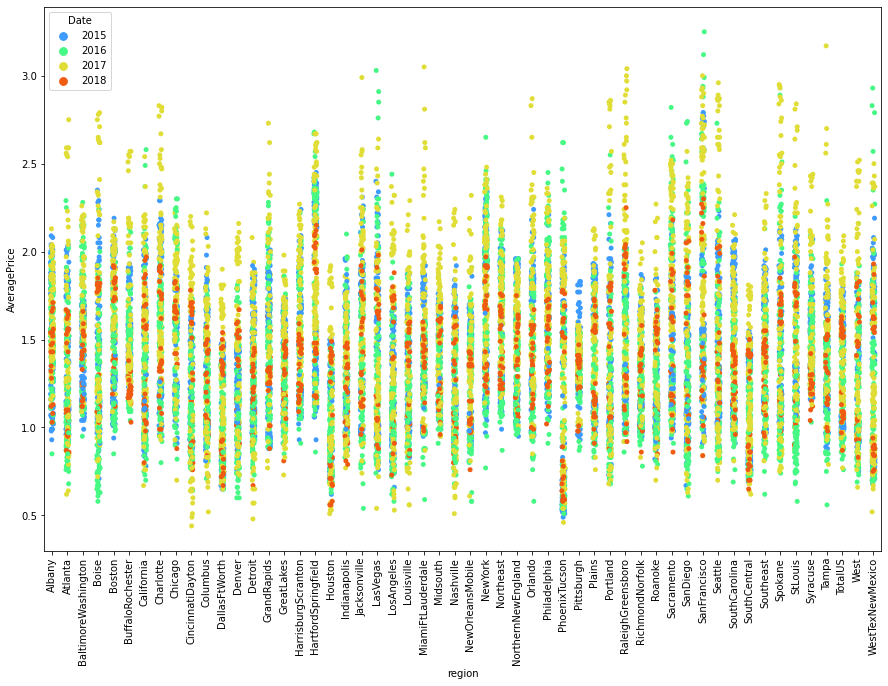

In [24]:
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="Date", data=df, palette="turbo")
plt.xticks(rotation=90)
plt.show()

In the above strip plot we see the Average Price of avacodos over all the regions in all 4 years. We can see that in years 2016 and 2017 the average prices were way higher than in the years 2015 and 2018.

## Multiviate Analysis

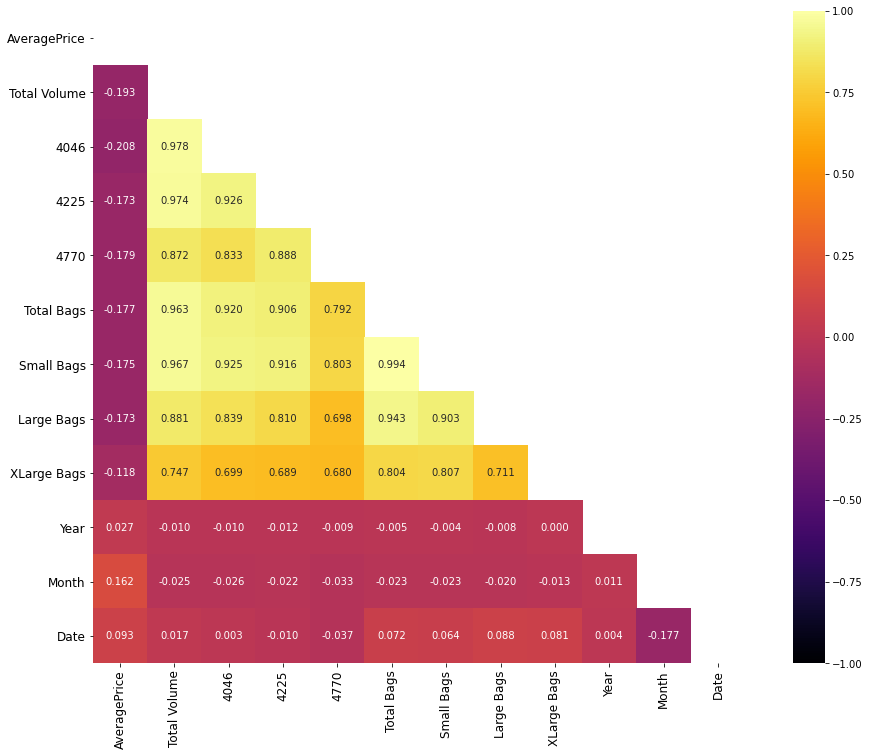

In [25]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We generated a pairplot for all our features and label column but it has turned out to be very tiny to be visible properly hence we will take help of a heatmap and understand the correlation details.

From the above heatmap we undertand that there is multicolinearity present in our feature columns. There are 2 types of correlation namely Positive correlation when a correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together and Negative correlation when a correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

Here we notice that columns PLU 4046, PLU 4225 and PLU 4770 are all product codes that comprise the Total Volume. Similarly, the columns Small Bags, Large Bags, Extra Large Bags all comprise the Total Bags. Therefore to sort out the multicolinearity concern we can drop the unnecessary columns.

In [26]:
df.drop(["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)

I am removing the columns "4046", "4225", "4770", "Small Bags", "Large Bags" and "XLarge Bags" to avoid the multi colinearity concern in our dataset.

# Encoding

In [27]:
oe = OrdinalEncoder()
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,1.33,64236.62,8696.87,0.0,0.0,27,12,2015
1,1.35,54876.98,9505.56,0.0,0.0,20,12,2015
2,0.93,118220.22,8145.35,0.0,0.0,13,12,2015
3,1.08,78992.15,5811.16,0.0,0.0,6,12,2015
4,1.28,51039.60,6183.95,0.0,0.0,29,11,2015
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,1.0,53.0,4,2,2018
18245,1.71,13888.04,9264.84,1.0,53.0,28,1,2018
18246,1.87,13766.76,9394.11,1.0,53.0,21,1,2018
18247,1.93,16205.22,10969.54,1.0,53.0,14,1,2018


Using the ordinal encoding method we have changed the object datatype columns into numeric values as machine learning models cannot process object data types.

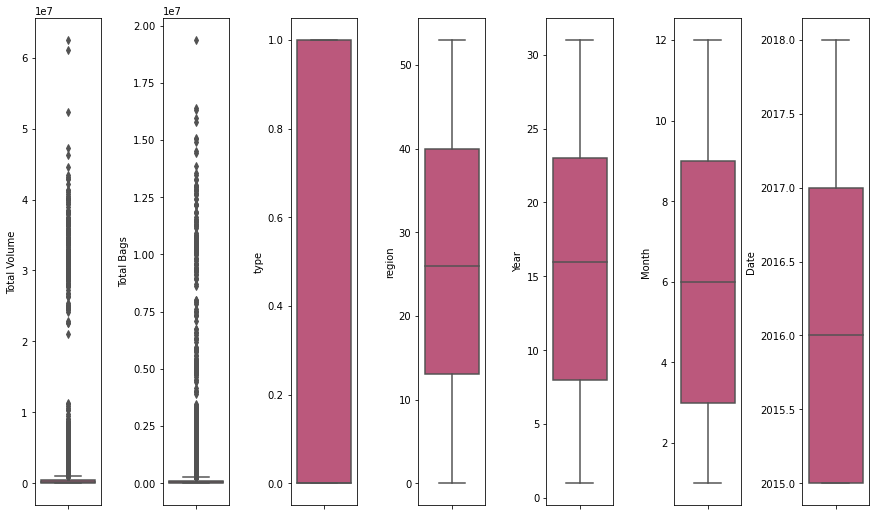

In [28]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df.drop("AveragePrice", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In the above box plot we see some outliers present in our feature columns "Total Volume" and "Total Bags" so we shall treat it with the usage of zscore.

# Using Z Score to remove outliers

In [29]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (18249, 8)
Shape of the dataframe after removing outliers:  (17931, 8)
Percentage of data loss post outlier removal:  1.7425612362321221


I have used the Z score method to remove any outlier that we could afford to lose from our original dataset. I see that since there were not many data points removed our new dataset would still have outlier traces but I would like to retain them.

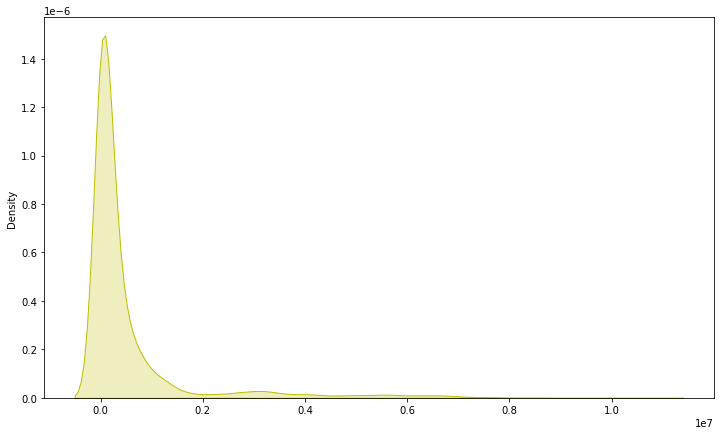

In [30]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Volume"], hist=False, color="y", kde_kws={"shade": True})
plt.show()


We see right skewness in the column Total Volume that had outliers too.

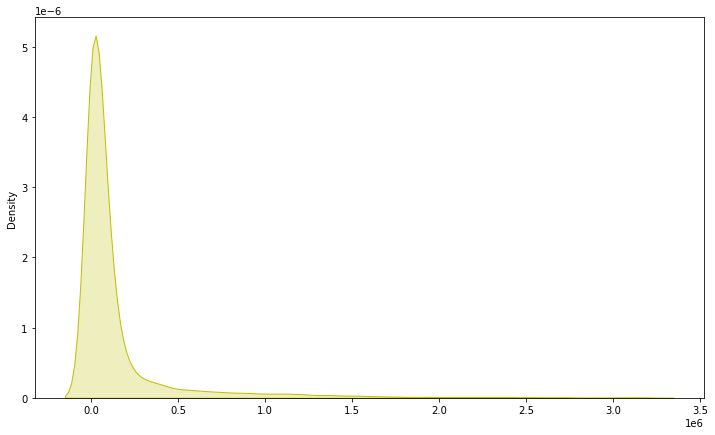

In [31]:
plt.figure(figsize=(12,7))
sns.distplot(x=df["Total Bags"], hist=False, color="y", kde_kws={"shade": True})
plt.show()

We see right skewness in the column Total Volume that had outliers too.

# Using Log Transform to fix skewness

In [32]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

I have applied Log Transformation on our columns to ensure that we do not have skewness in our dataset.

In [33]:
df.skew()

AveragePrice    0.388855
Total Volume   -0.024234
Total Bags     -0.334742
type           -0.005912
region          0.014808
Year            0.014381
Month           0.114771
Date            0.225227
dtype: float64

Now that we check our dataset we have all the columns almost in the range of +/-0.5

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [34]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column

# Feature Scaling

In [35]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Total Volume,Total Bags,type,region,Year,Month,Date
0,-0.090582,-0.493196,-1.00296,-1.694204,1.291781,1.650340,-1.215795
1,-0.161393,-0.452528,-1.00296,-1.694204,0.493909,1.650340,-1.215795
2,0.183695,-0.523161,-1.00296,-1.694204,-0.303964,1.650340,-1.215795
3,0.002395,-0.677598,-1.00296,-1.694204,-1.101837,1.650340,-1.215795
4,-0.193989,-0.649161,-1.00296,-1.694204,1.519745,1.367566,-1.215795
5,-0.152446,-0.613603,-1.00296,-1.694204,0.721872,1.367566,-1.215795
6,0.027100,-0.513521,-1.00296,-1.694204,-0.076001,1.367566,-1.215795
7,0.148946,-0.603766,-1.00296,-1.694204,-0.873873,1.367566,-1.215795
8,0.107584,-0.369872,-1.00296,-1.694204,-1.671746,1.367566,-1.215795
9,-0.024906,-0.496942,-1.00296,-1.694204,1.063818,1.084793,-1.215795


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Finding best random state for building Regression Models

In [36]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5021238214614998 on Random State 144


Great so with the help of random state selection process we have found our lucky number to be 144 amongst 1-1000

# Creating the training and testing data sets

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=144)

I am taking 25 percent of the complete dataset for training purpose and the remaing 75 percent with be used to train the machine learning models

# Machine Learning Model for Regression with Evaluation Metrics

In [38]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=708)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [39]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.2843241073646302
R2 Score is: 47.91662124818624
Cross Validation Score: 12.299369206677376
R2 Score - Cross Validation Score is 35.61725204150886


In [40]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.28468212924064595
R2 Score is: 47.78537153236971
Cross Validation Score: 12.572883789963507
R2 Score - Cross Validation Score is 35.2124877424062


In [41]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.39412850641568486
R2 Score is: -0.08004140738024912
Cross Validation Score: -116.71934809126752
R2 Score - Cross Validation Score is 116.63930668388727


In [42]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.26282234214243505
R2 Score is: 55.49627701086624
Cross Validation Score: -17.86082034695368
R2 Score - Cross Validation Score is 73.35709735781992


In [43]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.34831835261920735
R2 Score is: 21.83281058770876
Cross Validation Score: -140.9919895438091
R2 Score - Cross Validation Score is 162.82480013151786


In [44]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.2989887335685887
R2 Score is: 42.40544480051407
Cross Validation Score: -10.438314574611402
R2 Score - Cross Validation Score is 52.84375937512547


In [45]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.3000575991122408
R2 Score is: 41.99291505173225
Cross Validation Score: -11.302485573667434
R2 Score - Cross Validation Score is 53.29540062539968


In [46]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.28025763556073946
R2 Score is: 49.39578541290609
Cross Validation Score: -15.66944596032607
R2 Score - Cross Validation Score is 65.06523137323217


In [47]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.27318551133536384
R2 Score is: 51.917492715255435
Cross Validation Score: -2.2062818905600023
R2 Score - Cross Validation Score is 54.123774605815434


In [48]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.17757569039955573
R2 Score is: 79.68397189261597
Cross Validation Score: 17.710347432410536
R2 Score - Cross Validation Score is 61.973624460205436


In [49]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 0.13160122186629614
R2 Score is: 88.84186466937298
Cross Validation Score: 39.47426535954981
R2 Score - Cross Validation Score is 49.36759930982317


# Hyper parameter tuning on the best ML Model

In [50]:
# Choosing XGB Regressor

fmod_param = {'n_estimators' : [200, 400, 600],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }

After comparing all the regression models I have selected XGB Regressor as my best model and have listed down it's parameters above referring the sklearn webpage

In [51]:
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [52]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [53]:
GSCV.best_params_

{'gamma': 2.0, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -2}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model

In [54]:
GSCV.best_score_

0.7423465479786919

Here the Grid Search CV has provided me with the best score details



In [55]:
Final_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=200, n_jobs=-2)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 78.88427707762189


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

# now we use classification 

## Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the region

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [57]:
df2 = pd.read_csv("avocado.csv.zip")

In [58]:
df2

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [59]:
df2['Year'], df2['Month'], df2['Day'] = df2['Date'].str.split('-').str
df2.drop(columns=['Date','year'], inplace=True)
df2

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,06,12,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,04,02,2018
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,28,01,2018
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,21,01,2018
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,14,01,2018


In [60]:
df2['Year']=df2['Year'].astype(int)
df2['Month']=df2['Month'].astype(int)
df2['Date']=df2['Day'].astype(int)
df2.drop(columns=['Day'], inplace=True)
df2

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,6,12,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,4,2,2018
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,28,1,2018
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,21,1,2018
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,14,1,2018


In [61]:
df2.drop(["Unnamed: 0","4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags"], axis=1, inplace=True)

In [62]:
df2

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,1.33,64236.62,8696.87,conventional,Albany,27,12,2015
1,1.35,54876.98,9505.56,conventional,Albany,20,12,2015
2,0.93,118220.22,8145.35,conventional,Albany,13,12,2015
3,1.08,78992.15,5811.16,conventional,Albany,6,12,2015
4,1.28,51039.60,6183.95,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,13498.67,organic,WestTexNewMexico,4,2,2018
18245,1.71,13888.04,9264.84,organic,WestTexNewMexico,28,1,2018
18246,1.87,13766.76,9394.11,organic,WestTexNewMexico,21,1,2018
18247,1.93,16205.22,10969.54,organic,WestTexNewMexico,14,1,2018


# Encoding

In [149]:
oe = OrdinalEncoder()
df2['region']=oe.fit_transform(df2['region'].values.reshape(-1,1))
df2['type'] = oe.fit_transform(df2['type'].values.reshape(-1,1))

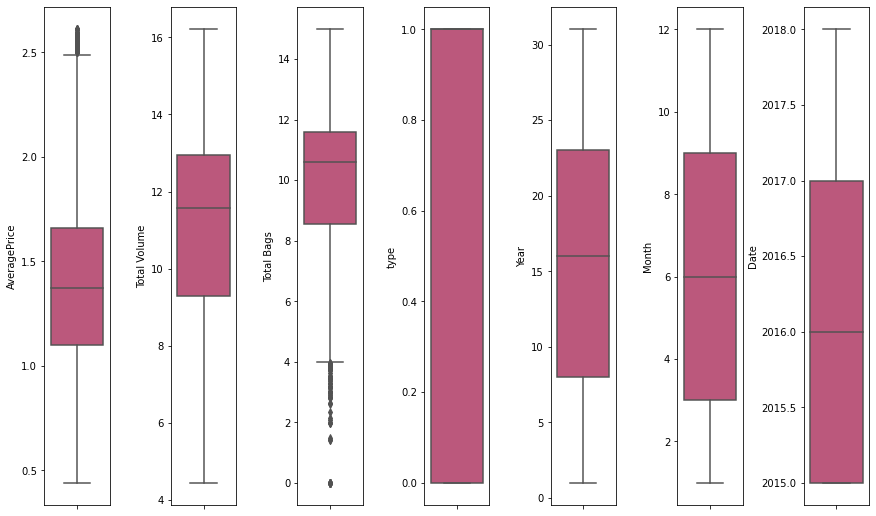

In [91]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(12,7))
index = 0
features = df2.drop("region", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

# Using Z Score to remove outliers

In [92]:
z = np.abs(zscore(df2))
threshold = 3
np.where(z>3)
df3 = df2[(z<3).all(axis=1)]
df3

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month,Date
0,0.845868,11.070344,9.070833,0.0,0.0,27,12,2015
1,0.854415,10.912867,9.159737,0.0,0.0,20,12,2015
2,0.657520,11.680313,9.005325,0.0,0.0,13,12,2015
3,0.732368,11.277116,8.667708,0.0,0.0,6,12,2015
4,0.824175,10.840377,8.729874,0.0,0.0,29,11,2015
...,...,...,...,...,...,...,...,...
18244,0.966984,9.745419,9.510421,1.0,53.0,4,2,2018
18245,0.996949,9.538855,9.134090,1.0,53.0,28,1,2018
18246,1.054312,9.530085,9.147945,1.0,53.0,21,1,2018
18247,1.075002,9.693150,9.302969,1.0,53.0,14,1,2018


# Check skewness

In [93]:
df2.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.014310
Month           0.106617
Date            0.215339
dtype: float64

In [118]:
X1 = df2.drop('region',axis=1)
Y1 = df2['region']

In [119]:
from sklearn.preprocessing import power_transform
X1 = power_transform(X1, method="yeo-johnson")

In [120]:
df2.skew()

AveragePrice    0.138629
Total Volume    0.088098
Total Bags     -0.218874
type            0.000329
region          0.000030
Year            0.014310
Month           0.106617
Date            0.215339
dtype: float64

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [122]:
X1 = df2.drop('region',axis=1)
Y1 = df2['region']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Feature Scaling

In [123]:
scaler = StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
X1.head(10)

,AveragePrice,Total Volume,Total Bags,type,Year,Month,Date
0,-0.111918,-0.107282,-0.494074,-0.999836,1.291857,1.647632,-1.221282
1,-0.060020,-0.175949,-0.454761,-0.999836,0.494231,1.647632,-1.221282
2,-1.255560,0.158690,-0.523041,-0.999836,-0.303396,1.647632,-1.221282
3,-0.801087,-0.017121,-0.672335,-0.999836,-1.101022,1.647632,-1.221282
4,-0.243636,-0.207558,-0.644845,-0.999836,1.519750,1.364669,-1.221282
5,-0.297133,-0.167273,-0.610471,-0.999836,0.722124,1.364669,-1.221282
6,-1.069669,0.006837,-0.513722,-0.999836,-0.075502,1.364669,-1.221282
7,-1.100259,0.124994,-0.600962,-0.999836,-0.873129,1.364669,-1.221282
8,-0.978816,0.084884,-0.374857,-0.999836,-1.670755,1.364669,-1.221282
9,-0.830350,-0.043595,-0.497696,-0.999836,1.063964,1.081706,-1.221282


# Resolving the class imbalance issue in label column

In [124]:
Y1.value_counts()

0.0     338
39.0    338
37.0    338
48.0    338
46.0    338
3.0     338
15.0    338
41.0    338
6.0     338
18.0    338
5.0     338
17.0    338
40.0    338
26.0    338
9.0     338
47.0    338
49.0    338
11.0    338
10.0    338
36.0    338
1.0     338
32.0    338
31.0    338
12.0    338
13.0    338
34.0    338
27.0    338
2.0     338
8.0     338
38.0    338
20.0    338
19.0    338
52.0    338
28.0    338
29.0    338
25.0    338
4.0     338
45.0    338
21.0    338
35.0    338
23.0    338
50.0    338
7.0     338
14.0    338
30.0    338
51.0    338
24.0    338
43.0    338
42.0    338
22.0    338
33.0    338
44.0    338
16.0    338
53.0    335
Name: region, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we willnot need to fix by using the oversampling method.

# Creating the training and testing data sets

In [125]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=759)

I am taking 25 percent of the complete dataset for testing purpose and the remaing 75 percent with be used to train the machine learning models using the random state as 759

# Machine Learning Model for Classification with Evaluation Metrics

In [128]:
# Classification Model Function

def classify(model, X1, Y1):
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=759)
    
    # Training the model
    model.fit(X1_train, Y1_train)
    
    # Predicting Y_test
    pred = model.predict(X1_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y1_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y1_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X1, Y1, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [130]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X1, Y1)

Accuracy Score: 28.840674994521148

Classification Report:
               precision    recall  f1-score   support

         0.0       0.37      0.54      0.44        80
         1.0       0.12      0.10      0.11        86
         2.0       0.53      0.32      0.40        96
         3.0       0.45      0.19      0.26        81
         4.0       0.20      0.27      0.23        81
         5.0       0.35      0.33      0.34        87
         6.0       0.39      0.35      0.37        81
         7.0       0.07      0.13      0.09        79
         8.0       0.57      0.49      0.52        78
         9.0       0.17      0.17      0.17        81
        10.0       0.09      0.11      0.10        75
        11.0       0.17      0.27      0.21        89
        12.0       0.35      0.27      0.30        94
        13.0       0.16      0.13      0.14        77
        14.0       0.35      0.28      0.31        85
        15.0       0.33      0.16      0.21        90
        16.0       0.

In [131]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X1, Y1)

Accuracy Score: 41.61735700197239

Classification Report:
               precision    recall  f1-score   support

         0.0       0.46      0.64      0.54        80
         1.0       0.38      0.24      0.30        86
         2.0       0.48      0.50      0.49        96
         3.0       0.43      0.36      0.39        81
         4.0       0.48      0.51      0.49        81
         5.0       0.41      0.33      0.37        87
         6.0       0.77      0.68      0.72        81
         7.0       0.26      0.47      0.33        79
         8.0       0.61      0.56      0.59        78
         9.0       0.25      0.31      0.28        81
        10.0       0.16      0.28      0.20        75
        11.0       0.35      0.55      0.43        89
        12.0       0.51      0.41      0.46        94
        13.0       0.19      0.32      0.24        77
        14.0       0.38      0.39      0.38        85
        15.0       0.46      0.34      0.39        90
        16.0       0.4

In [132]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X1, Y1)

Accuracy Score: 50.953320184089414

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.76      0.72        80
         1.0       0.34      0.27      0.30        86
         2.0       0.63      0.67      0.65        96
         3.0       0.54      0.47      0.50        81
         4.0       0.59      0.64      0.62        81
         5.0       0.46      0.46      0.46        87
         6.0       0.73      0.78      0.75        81
         7.0       0.29      0.49      0.37        79
         8.0       0.62      0.78      0.69        78
         9.0       0.33      0.35      0.34        81
        10.0       0.24      0.23      0.23        75
        11.0       0.46      0.58      0.51        89
        12.0       0.62      0.51      0.56        94
        13.0       0.29      0.29      0.29        77
        14.0       0.46      0.48      0.47        85
        15.0       0.60      0.50      0.55        90
        16.0       0.

In [133]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X1, Y1)

Accuracy Score: 15.801008108700415

Classification Report:
               precision    recall  f1-score   support

         0.0       0.21      0.31      0.25        80
         1.0       0.05      0.12      0.07        86
         2.0       0.13      0.22      0.17        96
         3.0       0.23      0.25      0.24        81
         4.0       0.07      0.15      0.10        81
         5.0       0.12      0.17      0.14        87
         6.0       0.23      0.38      0.29        81
         7.0       0.05      0.15      0.08        79
         8.0       0.35      0.37      0.36        78
         9.0       0.04      0.07      0.05        81
        10.0       0.07      0.12      0.09        75
        11.0       0.15      0.27      0.19        89
        12.0       0.18      0.14      0.16        94
        13.0       0.03      0.05      0.04        77
        14.0       0.20      0.19      0.20        85
        15.0       0.14      0.17      0.15        90
        16.0       0.

In [134]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X1, Y1)

Accuracy Score: 51.523120753889984

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.74      0.74        80
         1.0       0.36      0.33      0.34        86
         2.0       0.76      0.72      0.74        96
         3.0       0.44      0.52      0.48        81
         4.0       0.65      0.65      0.65        81
         5.0       0.61      0.57      0.59        87
         6.0       0.78      0.75      0.77        81
         7.0       0.39      0.46      0.42        79
         8.0       0.69      0.78      0.73        78
         9.0       0.31      0.37      0.34        81
        10.0       0.22      0.23      0.22        75
        11.0       0.52      0.52      0.52        89
        12.0       0.65      0.60      0.62        94
        13.0       0.24      0.27      0.26        77
        14.0       0.45      0.45      0.45        85
        15.0       0.56      0.49      0.52        90
        16.0       0.

In [135]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X1, Y1)

Accuracy Score: 53.47359193513039

Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.68      0.68        80
         1.0       0.40      0.38      0.39        86
         2.0       0.71      0.69      0.70        96
         3.0       0.52      0.56      0.54        81
         4.0       0.65      0.64      0.65        81
         5.0       0.55      0.57      0.56        87
         6.0       0.81      0.75      0.78        81
         7.0       0.38      0.46      0.41        79
         8.0       0.68      0.67      0.68        78
         9.0       0.36      0.40      0.37        81
        10.0       0.34      0.36      0.35        75
        11.0       0.54      0.55      0.55        89
        12.0       0.58      0.53      0.56        94
        13.0       0.30      0.39      0.34        77
        14.0       0.49      0.46      0.47        85
        15.0       0.60      0.61      0.61        90
        16.0       0.5

In [136]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X1, Y1)

Accuracy Score: 53.4516765285996

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.70      0.71        80
         1.0       0.35      0.36      0.35        86
         2.0       0.74      0.68      0.71        96
         3.0       0.48      0.52      0.50        81
         4.0       0.71      0.67      0.69        81
         5.0       0.55      0.53      0.54        87
         6.0       0.80      0.78      0.79        81
         7.0       0.41      0.48      0.44        79
         8.0       0.68      0.68      0.68        78
         9.0       0.34      0.37      0.36        81
        10.0       0.28      0.31      0.29        75
        11.0       0.62      0.60      0.61        89
        12.0       0.59      0.53      0.56        94
        13.0       0.33      0.39      0.36        77
        14.0       0.51      0.40      0.45        85
        15.0       0.60      0.56      0.57        90
        16.0       0.56

# Hyper parameter tuning on the best Classification ML Model

In [137]:
# Choosing Decision Tree Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

After comparing all the regression models I have selected Decision Tree Classifier as my best model and have listed down it's parameters above referring the sklearn webpage

In [138]:
GSCV = GridSearchCV(DecisionTreeClassifier(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [139]:
GSCV.fit(X1_train,Y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [140]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 4,
 'random_state': 42,
 'splitter': 'best'}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model

In [141]:
GSCV.best_score_

0.31207130166831554

Here the Grid Search CV has provided me with the best score details

In [143]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=4, 
                                     random_state=42, splitter="best")
Classifier = Final_Model.fit(X1_train, Y1_train)
fmod_pred = Final_Model.predict(X1_test)
fmod_acc = (accuracy_score(Y1_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 30.988384834538678


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# Confusion Matrix

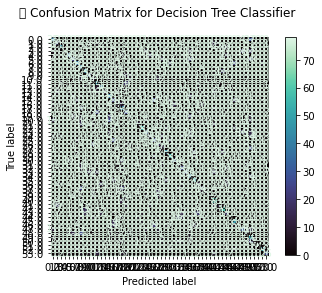

In [145]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X1_test, Y1_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

# Saving the model

In [146]:
filename = "FinalModel_E03.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E03.pkl']

Finally I am saving my best classification model using the joblib library.